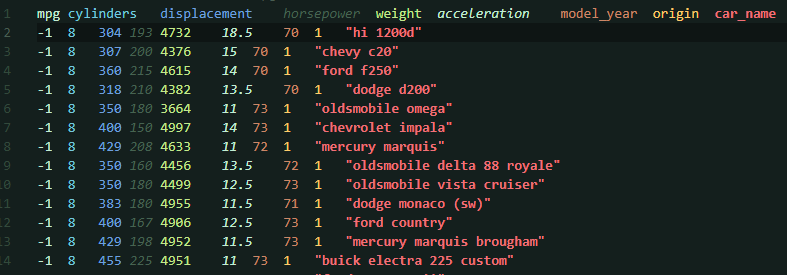

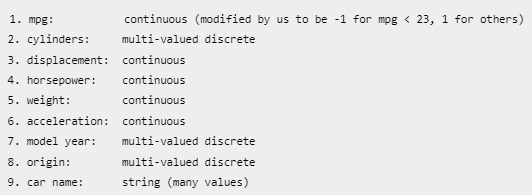

In [577]:
import numpy as np

np.set_printoptions(suppress=True, precision=4)

data = np.array([[200, 800, 200, 800],
            [0.2,  0.2,  0.8,  0.8]])  # transpose such that features are row vectors
labels = np.array([[-1, -1, 1, 1]])

def scale_vector(v):
    print("v =", v)
    print("mean of v =", np.mean(v))
    print("std of v =", np.std(v))
    return (v - np.mean(v)) / np.std(v)

scale_vector(np.array([200, 800, 200, 800]))

# X = data.T
# n = X.shape[0]
# d = X.shape[1]

# print("X before:\n", X)
# X = np.hstack([scale_vector(X[:, i].reshape((n, 1))) for i in range(d)])
# print("X after:\n", X)

v = [200 800 200 800]
mean of v = 500.0
std of v = 300.0


array([-1.,  1., -1.,  1.])

In [578]:
def scale_vector(v):
    return (v - np.mean(v)) / np.std(v)

def perceptron(X, y, T=10):
    n = X.shape[0]
    d = X.shape[1]
    
    X = np.hstack((X, np.ones(n).reshape((n, 1))))  # add intercept column
    # print("X =", X)
    
    theta = np.zeros(d+1)  # initialize theta, theta_0 as theta
    # print("theta_init =", theta)
    mistakes = 0
    for t in range(T):
        # print("-"*40)
        # print(f"* Iteration {t+1}")
        for i in range(n):
            x = X[i, :]
            # print("  theta =", theta)
            # print("  x =", x)
            # print("np.dot(theta, x) * y[i] =", np.dot(theta, x) * y[i])
            if np.dot(theta, x) * y[i] <= 0:
                # print("**MISTAKE**")
                mistakes += 1
                theta += y[i] * x
        # print(f"  theta at Iteration {t} =", theta)
        # print(f"Cumulative mistakes at Iteration {t} =", mistakes)
    
    return theta, mistakes

In [579]:
def calc_margin(theta, X, y):
    n = X.shape[0]
    d = X.shape[1]
    
    X = np.hstack((X, np.ones(n).reshape((n, 1))))  # add intercept column
    margin_arr = []
    for i in range(n):
        x = X[i, :]
        margin = y[i] * np.dot(theta, x) / np.linalg.norm(theta[:-1])
        margin_arr.append(margin)
    gamma = min(margin_arr)
    return gamma

In [580]:
# theta, mistakes = perceptron(data.T, labels[0], 8888897)
# print("theta =", theta)
# print("mistakes =", mistakes)

In [581]:
X = data.T
y = labels[0]
n = X.shape[0]
d = X.shape[1]

X = np.hstack((X, np.ones(n).reshape((n, 1))))
X

array([[200. ,   0.2,   1. ],
       [800. ,   0.2,   1. ],
       [200. ,   0.8,   1. ],
       [800. ,   0.8,   1. ]])

In [582]:
X = np.hstack((data.T[:, 0].reshape((data.T.shape[0], 1)) * 0.001, data.T[:, 1:]))
y = labels[0]
n = X.shape[0]
d = X.shape[1]

X = np.hstack((X, np.ones(n).reshape((n, 1))))
print(X)

theta = np.array([0, 1, -0.5])
margins = y * (X @ theta)
gamma = np.min(margins / np.linalg.norm(theta[:]))
gamma

[[0.2 0.2 1. ]
 [0.8 0.2 1. ]
 [0.2 0.8 1. ]
 [0.8 0.8 1. ]]


0.2683281572999747

In [583]:
# X = data.T
R = np.max(np.apply_along_axis(np.linalg.norm, axis=1, arr=X))
R

1.50996688705415

In [584]:
(R/gamma)**2

31.666666666666686

In [585]:
X = data.T * 0.001
X = np.hstack((X, np.ones(n).reshape((n, 1))))
R_2 = np.max(np.apply_along_axis(np.linalg.norm, axis=1, arr=X))
R_2

1.2806250973645645

In [586]:
(R_2 / 0.0003)**2

18222229.33333334

In [587]:
X = np.hstack((data.T[:, 0].reshape((data.T.shape[0], 1)) * 0.001, data.T[:, 1:]))
y = labels[0]
n = X.shape[0]
d = X.shape[1]

X = np.hstack((X, np.ones(n).reshape((n, 1))))
print("X =\n", X)
print("y =\n", y)

theta, mistakes = perceptron(X, y, 100)
print("theta =", theta)
print("mistakes =", mistakes)

X =
 [[0.2 0.2 1. ]
 [0.8 0.2 1. ]
 [0.2 0.8 1. ]
 [0.8 0.8 1. ]]
y =
 [-1 -1  1  1]
theta = [-0.2  2.8 -1.  -1. ]
mistakes = 11


In [588]:
data =   np.array([[2, 3,  4,  5]])
labels = np.array([[1, 1, -1, -1]])

X = data.T
y = labels[0]
n = X.shape[0]
d = X.shape[1]

print("X =\n", X)
print("y =\n", y)

theta, mistakes = perceptron(X, y, 100)
print("theta =", theta)
print("mistakes =", mistakes)

X =
 [[2]
 [3]
 [4]
 [5]]
y =
 [ 1  1 -1 -1]
theta = [-2.  7.]
mistakes = 29


In [589]:
data = np.array([[1, 6]])
print("data shape:", data.shape)
X = data.T

def classify(X, theta):
    n = X.shape[0]
    d = X.shape[1]
    
    theta.reshape((d+1, 1))  # convert to col vector (careful about intercept)
    X = np.hstack((X, np.ones(n).reshape((n, 1))))  # add intercept column
    sign_arr = np.sign(X @ theta)
    sign_arr[sign_arr == 0] = -1
    return sign_arr

classify(X, theta)

data shape: (1, 2)


array([ 1., -1.])

In [590]:
np.zeros(2).shape

(2,)

In [591]:
import numpy as np

def one_hot(x, k):
    # Make an empty column vector
    v = np.zeros((k, 1))
    # Set an entry to 1
    v[x-1, 0] = 1
    return v

one_hot(3, 7)

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [592]:
data =   np.hstack([one_hot(i, 6) for i in range(2, 6)])
labels = np.array([[1, 1, -1, -1]])

X = data.T
y = labels[0]
n = X.shape[0]
d = X.shape[1]

print("X =\n", X)
print("y =\n", y)

theta, mistakes = perceptron(X, y, 100)
print("theta =", theta.tolist())
print("mistakes =", mistakes)

X =
 [[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]
y =
 [ 1  1 -1 -1]
theta = [0.0, 2.0, 1.0, -2.0, -1.0, 0.0, 0.0]
mistakes = 6


In [593]:
data = np.hstack([one_hot(i, 6) for i in [1, 6]])
X = data.T
n = X.shape[0]
d = X.shape[1]

# X = np.hstack((X, np.ones(n).reshape((n, 1))))  # add intercept column
print(X)
classify(X, theta)

[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]


array([-1., -1.])

In [595]:
import itertools
data = np.hstack([one_hot(i, 6) for i in range(1, 7)])
mistakes_arr = []
labels_comb = list(itertools.product([-1, 1], repeat=6))
X = data
n = X.shape[0]
d = X.shape[1]
for labels in labels_comb:
    y = np.array(labels)

    # print("X =\n", X)
    print("y =\n", y)

    theta, mistakes = perceptron(X, y, 100)
    mistakes_arr.append(mistakes)
    # print("theta =", theta.tolist())
print("max mistake =", max(mistakes_arr))

y =
 [-1 -1 -1 -1 -1 -1]
y =
 [-1 -1 -1 -1 -1  1]
y =
 [-1 -1 -1 -1  1 -1]
y =
 [-1 -1 -1 -1  1  1]
y =
 [-1 -1 -1  1 -1 -1]
y =
 [-1 -1 -1  1 -1  1]
y =
 [-1 -1 -1  1  1 -1]
y =
 [-1 -1 -1  1  1  1]
y =
 [-1 -1  1 -1 -1 -1]
y =
 [-1 -1  1 -1 -1  1]
y =
 [-1 -1  1 -1  1 -1]
y =
 [-1 -1  1 -1  1  1]
y =
 [-1 -1  1  1 -1 -1]
y =
 [-1 -1  1  1 -1  1]
y =
 [-1 -1  1  1  1 -1]
y =
 [-1 -1  1  1  1  1]
y =
 [-1  1 -1 -1 -1 -1]
y =
 [-1  1 -1 -1 -1  1]
y =
 [-1  1 -1 -1  1 -1]
y =
 [-1  1 -1 -1  1  1]
y =
 [-1  1 -1  1 -1 -1]
y =
 [-1  1 -1  1 -1  1]
y =
 [-1  1 -1  1  1 -1]
y =
 [-1  1 -1  1  1  1]
y =
 [-1  1  1 -1 -1 -1]
y =
 [-1  1  1 -1 -1  1]
y =
 [-1  1  1 -1  1 -1]
y =
 [-1  1  1 -1  1  1]
y =
 [-1  1  1  1 -1 -1]
y =
 [-1  1  1  1 -1  1]
y =
 [-1  1  1  1  1 -1]
y =
 [-1  1  1  1  1  1]
y =
 [ 1 -1 -1 -1 -1 -1]
y =
 [ 1 -1 -1 -1 -1  1]
y =
 [ 1 -1 -1 -1  1 -1]
y =
 [ 1 -1 -1 -1  1  1]
y =
 [ 1 -1 -1  1 -1 -1]
y =
 [ 1 -1 -1  1 -1  1]
y =
 [ 1 -1 -1  1  1 -1]
y =
 [ 1 -1 -1  1  1  1]


In [601]:
import numpy as np
from itertools import combinations_with_replacement

def trans_to_poly(x, k):
    """Generates a k degree polynomial feature vector from naked feature vector x.
    e.g. x = [x_1, x_2] -> [1, x_1, x_2, x_1*x_2, x_1^2, x_2^2] for k=2

    Args:
        x (np.array): feature vector before transformation
        k (int): degree of polynomial, k >= 1
    """
    # Initialize the transformed feature vector with the bias term
    poly_features = [1.0]
    
    # Get the length of the input feature vector
    n = len(x)
    
    # Generate polynomial features for each degree from 1 to k
    for degree in range(1, k + 1):
        for combo in combinations_with_replacement(range(n), degree):
            product = np.prod([x[i] for i in combo])
            poly_features.append(product)
    
    return np.array(poly_features)

# Example usage
x = np.array([2, 3])
k = 2
# poly_features = trans_to_poly(x, k)
[len(trans_to_poly(x, k)) for k in [1, 10, 20, 30, 40, 50]]


[3, 66, 231, 496, 861, 1326]

In [602]:
data = np.array([[1, 1, 2, 2],
         [1, 2, 1, 2]])
labels = np.array([[-1, 1, 1, -1]])